# <center>VIDEO GAME SALES 🎮</center>

<center><img src="https://i.imgur.com/FgGBSeq.gif"></center>

# Description

This dataset contains a list of video games with sales greater than 100,000 copies till 2016.

**Data description**

   * Name - The games name

   * Platform - Platform of the games release (i.e. PC,PS4, etc.)

   * Year_of_Release - Year of the game's release

   * Genre - Genre of the game

   * NA_sales - Sales in North America (in USD millions)

   * EU_sales - Sales in Europe (in USD millions)

   * JP_sales - Sales in Japan (in USD millions)

   * Other_Sales - Sales in the rest of the world (in USD millions)

   * Critic_Score (maximum of 100) - Critics review score

   * User_Score (maximum of 10) - Users review score

   * Rating (ESRB) - Ratings determined by the Entertainment Software Rating Board

# Objective
In this <b>project</b> I will deal only with <b>data preprocessing, exploratory data analysis and statistical data analysis</b>, where the objective is to understand how the data is distributed and generate insight for future decision-making in order to identify patterns that determine whether a game succeeds or not. This will allow companies to spot potential top games and plan advertising campaigns, this analysis aims to explore as much as possible the data in a simple, intuitive and informative way. The data used in this project contains information only from <b>1980</b> to <b>2016</b>. Below is a sketch of all the stages made in these notebooks, following a logical and intuitive sequence to facilitate the understanding of the data.

# Table of Contents

**Step 1. Open the data file and study the general information**<br>
A. [Used libraries](#bibliotheque)<br>
B. [Explore file information](#information)<br>

**Step 2. Prepare the data**<br>
A. [Replace the column names](#colonnes)<br>
B. [Handle missing values](#valeurs_manquantes)<br>
C. [Convert the data to the required types](#conversion)<br>
D. [Calculate the total sales for each game](#ventes_totales)<br>
E. [Handle invalid data](#invalide)<br>

**Step 3. Analyze the data (EDA)**<br>
A. [Games per Year](#graphique1)<br>
B. [Top Platforms](#graphique2)<br>
C. [Prognosis for 2017](#2017)<br>
D. [Sales by Critic/User Reviews](#revue)<br>
E. [Top Genres by Sales](#genre)<br>

# Step 1. Open the data file and study the general information

## A. Used libraries

<a id="bibliotheque"></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
import plotly.express as px

## B. Explore file information

<a id="information"></a>

In [98]:
try:
    df = pd.read_csv('/datasets/games.csv')
    df.info()
except FileNotFoundError:
    sys.exit('Error: CSV file was not found')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [99]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Step 2. Prepare the data

## A. Replace the column names

<a id="colonnes"></a>

In [100]:
# make them lowercase
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## B. Handle missing values

<a id="valeurs_manquantes"></a>

In [101]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [102]:
df.dropna(subset=['name', 'year_of_release'], inplace=True)

# TODO
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN
# df.fillna(value='tbd', inplace=True) # critic_score is converted automatically to 'object'
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

### Conclusion

I removed a total of 271 records in the `year_of_release` and `name` columns because these values are invalid/NaN and a small portion of our data.<br>
As for `critic_score`, `user_score` and `rating` we can see that they are approx 50% of our data. Therefore instead of removing them which would be disastrous
I entered `tbd` in their missing values because they share a common property of <i>score</i>. `critic_score` is <b>converted automatically</b> to `object` after using `fillna()` method.

`tbd` means "To Be Determined". The reason `tbd` is in missing values is because there may have not been a review when the data was gathered so it's better to leave it as `tbd` which is a valid value.

## C. Convert the data to the required types

<a id="conversion"></a>

In [103]:
# Convert year_of_release -> int to fit its proper data type
df['year_of_release'] = df['year_of_release'].astype('int64')
# TODO 
df['user_score'] = df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## D. Calculate the total sales for each game

<a id="ventes_totales"></a>

In [104]:
# Calculate the sum of sales in all regions
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## E. Handle invalid data

<a id="invalide"></a>

Noticed that DS(Nintendo DS) was released on 2004(<a href="https://en.wikipedia.org/wiki/Nintendo_DS">source</a>) and there is 1 game from 1985 where its platform is DS

In [105]:
filt = (df['platform'] == 'DS') & (df['year_of_release'] < 2004)
df[filt]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [106]:
# Delete this row based on a conditional expression
df.drop(df[filt].index, inplace=True)

# Step 3. Analyze the data (EDA)

## A. Games per Year

<a id="graphique1"></a>

In [107]:
games_per_year = df.groupby('year_of_release')['name'].count()
games_per_year.head()

year_of_release
1980     9
1981    46
1982    36
1983    17
1984    14
Name: name, dtype: int64

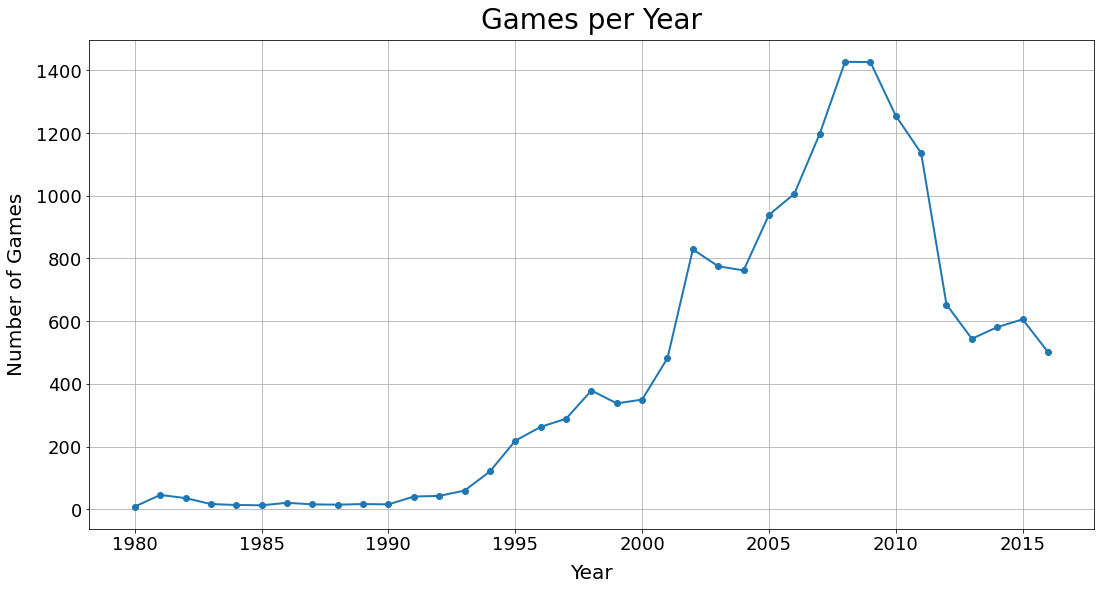

In [108]:
games_per_year.plot(style='o-', figsize=(18, 9), linewidth=2, grid=True) # 'o-': connected scatter plot
plt.title("Games per Year", fontsize=28, y=1.01)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.xlabel("Year", fontsize=20, labelpad=10)
plt.ylabel("Number of Games", fontsize=20, labelpad=10)
plt.show()

### Conclusion

We can see that the number of games has been continually increasing. There was a peak in 2008-2009 and a significant slope right after which was at the time of of the <a href="https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008">recession</a>, which affected the video game industry as well as other industries.

## B. Top Platforms

<a id="graphique2"></a>

In [109]:
# Top 5 platforms with the greatest total sales
top_5 = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()
platform_names = top_5.index
fig = px.pie(top_5, values='total_sales', names=platform_names, title='Top Platforms by Total Sales')
fig.show()

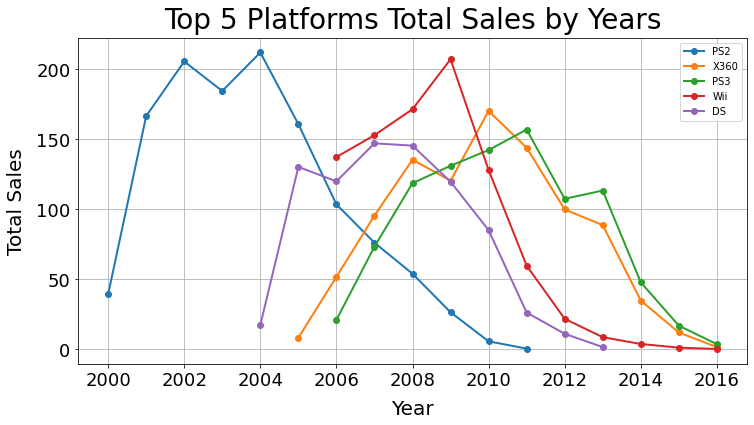

In [110]:
top_platforms = df.query('platform in @platform_names')
platform_group = top_platforms.groupby(['platform', 'year_of_release']).sum()
platform_group.reset_index(inplace=True)

ps2_group = platform_group[platform_group['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum()
x360_group = platform_group[platform_group['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum()
ps3_group = platform_group[platform_group['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum()
wii_group = platform_group[platform_group['platform'] == 'Wii'].groupby('year_of_release')['total_sales'].sum()
ds_group = platform_group[platform_group['platform'] == 'DS'].groupby('year_of_release')['total_sales'].sum()

#plt.plot(ps2_group, x360_group, ps3_group, wii_group, ds_group, style='-o', color=('steelblue', "seagreen", "firebrick", "darkorange", "red"), figsize=(16, 14), linewidth=2)
ps2_group.plot(style='-o', figsize=(12, 6), linewidth=2)
x360_group.plot(style='-o', figsize=(12, 6), linewidth=2)
ps3_group.plot(style='-o', figsize=(12, 6), linewidth=2)
wii_group.plot(style='-o', figsize=(12, 6), linewidth=2)
ds_group.plot(style='-o', figsize=(12, 6), linewidth=2)

plt.title("Top 5 Platforms Total Sales by Years", fontsize=28, y=1.01)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.xlabel("Year", fontsize=20, labelpad=10)
plt.ylabel("Total Sales", fontsize=20, labelpad=10)
plt.grid()
plt.legend(labels=platform_names)
plt.show()

### Conclusion

We can see that all of the top platforms were very popular when they came out with continous rise in sales but after 3-5 years their total sales began dropping till they reached 0 sales. We can infer from that the the life-span of a popular platform is 4~ years and then it's a good time to think about the next platform to produce. 

Also, we can see that it generally take 0-2 for a new platform to appear and become popular and fading takes longer 6-7 years(probably because of fan-base communities that were made over time)

## C. Prognosis for 2017

<a id="2017"></a>

In [111]:
# in order to make a prognosis for 2017 we'll examine the data between 2014-2016 to see the trend
prognosis = df.query('2014 <= year_of_release <= 2016')
prognosis.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [112]:
# Top 5 platforms with the greatest total sales 2014-2016
top_5 = prognosis.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()
platform_names = top_5.index
fig = px.pie(top_5, values='total_sales', names=platform_names, title='Top Platforms by Total Sales 2014-2016')
fig.show()

### Conclusion

We can see that between 2014-2016 new next-gen platforms rise and shine with PS4, Xbox One and 3DS leading in sales and that the old platforms begin to shrink in sales like PS4 and Xbox 360

In [113]:
fig = px.box(prognosis, x='platform', y='total_sales')
fig.update_layout(autosize=False, width=1500, height=600)
fig.show()

In [114]:
# average sales on platforms
prognosis.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

platform
PS4     0.766356
XOne    0.615614
WiiU    0.588767
Wii     0.460909
X360    0.434414
3DS     0.408868
PS3     0.311324
PC      0.179139
PSV     0.075932
PSP     0.027692
Name: total_sales, dtype: float64

### Conclusion

We can see that there's a major difference between next-gen platforms and old-gen platforms. For example, by looking at the boxplot we see that PS4 and Xbox One have way more sales than their previous platform(PS3 and Xbox 360).

New platforms average sales is about 2~ times larger than old-gen platforms

## D. Sales by Critic/User Reviews

<a id="revue"></a>

### PS4 Platform

*PS4 total sales* and *critic score* correlation: 0.40266141068104094


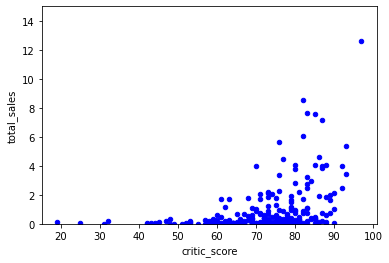

In [115]:
ps4 = prognosis[prognosis['platform'] == 'PS4']

sales_by_critic_score = pd.concat([ps4['total_sales'], ps4['critic_score']], axis=1)
sales_by_critic_score.plot.scatter(x='critic_score', y='total_sales', ylim=(0, 15), c='blue')
print('*PS4 total sales* and *critic score* correlation: {}'.format(sales_by_critic_score['total_sales'].corr(sales_by_critic_score['critic_score'])))

*PS4 total sales* and *user score* correlation: -0.04013158947269733


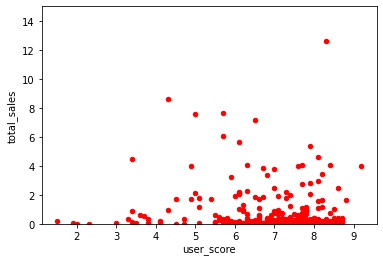

In [116]:
sales_by_user_score = pd.concat([ps4['total_sales'], ps4['user_score']], axis=1)
sales_by_user_score.plot.scatter(x='user_score', y='total_sales', ylim=(0, 15), c='red')
print('*PS4 total sales* and *user score* correlation: {}'.format(sales_by_user_score['total_sales'].corr(sales_by_user_score['user_score'])))

### Conclusion

When examining PS4 platform we can see that: 

On the one hand, total sales are increasing when the critic scores are higher and the correlation between them is positive.
On the other hand, total sales remain about the same when the user scores are increasing and the correlation between them equals 0.

### Other Platforms

*Other Platforms total sales* and *critic score* correlation: 0.3094740026001153


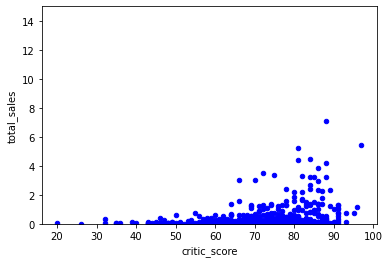

In [117]:
other_platforms = prognosis[prognosis['platform'] != 'PS4']

sales_by_critic_score = pd.concat([other_platforms['total_sales'], other_platforms['critic_score']], axis=1)
sales_by_critic_score.plot.scatter(x='critic_score', y='total_sales', ylim=(0, 15), c='blue')
print('*Other Platforms total sales* and *critic score* correlation: {}'.format(sales_by_critic_score['total_sales'].corr(sales_by_critic_score['critic_score'])))

*Other Platforms total sales* and *user score* correlation: -0.023478187237975554


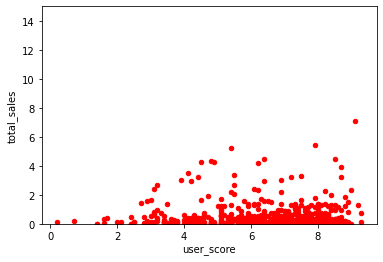

In [118]:
sales_by_user_score = pd.concat([other_platforms['total_sales'], other_platforms['user_score']], axis=1)
sales_by_user_score.plot.scatter(x='user_score', y='total_sales', ylim=(0, 15), c='red')
print('*Other Platforms total sales* and *user score* correlation: {}'.format(sales_by_user_score['total_sales'].corr(sales_by_user_score['user_score'])))

### Conclusion

Keeping the previous conclusion in mind we see similarity when examining the other platforms instead of only PS4: 

We can infer that people are most likely to buy a game with a professional critic review rather than a user review.

## E. Top Genres by Sales

<a id="genre"></a>

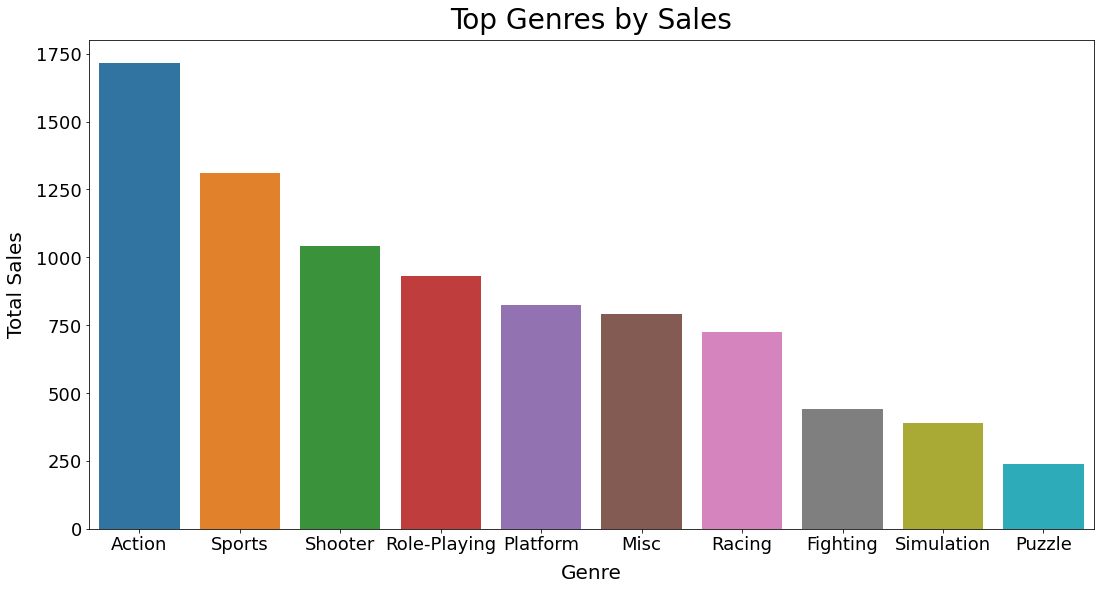

In [119]:
# Top 5 platforms with the greatest total sales 2014-2016
top_10 = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(10)
genre_names = top_10.index
fig,ax = plt.subplots(figsize=(18, 9))
sns.barplot(x=genre_names, y=top_10, ax=ax)
plt.title("Top Genres by Sales", fontsize=28, y=1.01)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.xlabel("Genre", fontsize=20, labelpad=10)
plt.ylabel("Total Sales", fontsize=20, labelpad=10)
plt.show()

### Conclusion

We can clearly see that `Action`, `Sports` and `Shooter` are the most popular genres. The high sales genres are popular and make the most sales because they are characterized with easy-to-play interfaces and focus on creating an emotional thrill for the players, while the low sales genres focus on creating some complex mechanisms designed to get the players thinking harder and in a variety of ways. For example, the reason `Action` games are more popular than `Puzzle` games is because most people are entertained by emotional thrill rather than working their brain. The average person works their brain beyond the limit of satisfactory in their everyday lives and don't want to work it out more in their free time, and if they do they usually just take more hours at work rather than play video games.